In [746]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import seaborn as sns

In [747]:
gl = pd.read_csv('../csv/game_lineups.csv')

### Step 1: Data Understanding ###
+ Dataframe shape
+ head 
+ dtypes
+ describe

In [748]:
gl.shape

(119133, 9)

In [749]:
gl.head()

,game_lineups_id,game_id,club_id,type,number,player_id,player_name,team_captain,position
0,77b0f371923e0c8bdf050a1e269faaac,3606208,338,starting_lineup,89,419061,Vladyslav Supryaga,0,Centre-Forward
1,cb6eeedb9f728570615d37b6fe7facaf,3606208,338,starting_lineup,10,368611,Mykola Shaparenko,0,Central Midfield
2,8e63d5f47aac2bdb0e54f5481986e104,3606208,338,starting_lineup,5,124182,Sergiy Sydorchuk,1,Defensive Midfield
3,ea4a96d8be410f2d646cf095c4faae7f,3606208,338,starting_lineup,94,181118,Tomasz Kedziora,0,Right-Back
4,e6abe553801b09bc623c3deb96acba17,3606208,338,starting_lineup,16,404842,Vitaliy Mykolenko,0,Left-Back


In [750]:
gl.columns

Index(['game_lineups_id', 'game_id', 'club_id', 'type', 'number', 'player_id',
       'player_name', 'team_captain', 'position'],
      dtype='object')

In [751]:
gl.dtypes

game_lineups_id    object
game_id             int64
club_id             int64
type               object
number             object
player_id           int64
player_name        object
team_captain        int64
position           object
dtype: object

In [752]:
gl['number'].describe

<bound method NDFrame.describe of 0         89
1         10
2          5
3         94
4         16
          ..
119128     3
119129     5
119130    13
119131    12
119132    10
Name: number, Length: 119133, dtype: object>

+ game_lineups_id: The unique identifier for the game lineups.
+ game_id: The identifier for a specific game.
+ club_id: The identifier for a specific club/team.
+ type: Indicates whether it's a substitution or a starting lineup.
+ number: The player's t-shirt number.
+ player_id: The identifier for a specific player.
+ player_name: The name of the player.
+ team_captain: Indicates if the player is the team captain, where 0 or 1 represents no or yes, respectively.
+ position: The player's position or role on the team.

### Step 2: Data Preperation ###
+ Dropping irrelevant columns and rows
+ Identifying duplicated columns
+ Feature Creation
+ Casting dtypes
+ Adding new columns

In [753]:
gl['game_lineups_id'].unique()

array(['77b0f371923e0c8bdf050a1e269faaac',
       'cb6eeedb9f728570615d37b6fe7facaf',
       '8e63d5f47aac2bdb0e54f5481986e104', ...,
       '09cc07767ce441b4de4a76c102fd17d5',
       '3c259f1849421af021aba3e84a4da8de',
       '92f069e6041dae45375081d7662b2c12'], dtype=object)

In [754]:
gl['game_id'].duplicated().sum()

116216

In [755]:
gl['game_id'].unique()

array([3606208, 3998376, 3998377, ..., 4227998, 4227999, 4228114],
      dtype=int64)

In [756]:
gl['club_id'].unique()

array([ 338,  660,  418, ..., 2795, 2451, 3026], dtype=int64)

In [757]:
gl['type'].unique()

array(['starting_lineup', 'substitutes'], dtype=object)

In [758]:
gl['number'].unique()

array(['89', '10', '5', '94', '16', '25', '34', '71', '29', '14', '15',
       '22', '1', '13', '20', '24', '18', '8', '7', '19', '30', '23',
       '11', '38', '21', '6', '2', '31', '3', '45', '26', '44', '4', '17',
       '12', '9', '33', '28', '36', '64', '27', '62', '32', '42', '39',
       '43', '41', '40', '35', '88', '98', '87', '95', '99', '57', '47',
       '80', '82', '52', '48', '55', '60', '91', '49', '37', '61', '65',
       '66', '50', '53', '78', '46', '63', '54', '83', '81', '90', '77',
       '74', '69', '93', '51', '72', '92', '68', '96', '76', '70', '75',
       '56', '-', '97', '59', '85', '67', '58', '84', '79', '73', '86'],
      dtype=object)

In [759]:
gl['team_captain'].unique()

array([0, 1], dtype=int64)

In [760]:
gl['player_name'].duplicated().sum()

94221

In [761]:
gl['player_id'].duplicated().sum()

93840

In [762]:
gl['player_id'].isna().sum()

0

In [763]:
from pandasql import sqldf

query = """
SELECT player_name, player_id
FROM gl
WHERE player_name IN (
    SELECT player_name
    FROM gl
    GROUP BY player_name
    HAVING COUNT(DISTINCT player_id) > 1
)
ORDER BY player_name, player_id
"""

result = sqldf(query, globals())

print(result)

         player_name  player_id
0     Aaron Donnelly     372755
1     Aaron Donnelly     372755
2     Aaron Donnelly     372755
3     Aaron Donnelly     372755
4     Aaron Donnelly     624243
...              ...        ...
3043    Óscar Cortés     975689
3044    Óscar Cortés     975689
3045    Óscar Cortés    1199515
3046  Óscar González     455699
3047  Óscar González     945754

[3048 rows x 2 columns]


In [764]:
#This player has the same player_name but a different player_id. We assume it's a different person
players_with_same_name = gl[gl['player_name'] == "Álvaro Sánchez"]

print(players_with_same_name)

                         game_lineups_id  game_id  club_id         type  \
109752  3773bce0f783fd1b653e6f4e8a52c52c  4192076    55644  substitutes   
109780  db9ef2a50c3461685e3655c9643dc97e  4192077   112753  substitutes   
112251  689fbcc2fe01939316725987c14a83b5  4203999   112753  substitutes   

       number  player_id     player_name  team_captain          position  
109752      -    1198983  Álvaro Sánchez             0            Attack  
109780      6    1194996  Álvaro Sánchez             0  Central Midfield  
112251      6    1194996  Álvaro Sánchez             0  Central Midfield  


In [765]:
#Many players do not have a t-shirt number
player_with_no_number = gl[gl['number'] == "-"]

print(player_with_no_number.head(10))

                        game_lineups_id  game_id  club_id             type  \
4494   42f8366511f32a26d3e3431edfdbc54f  4089207     6808      substitutes   
5151   174187da4ec16383e94a41a343d9af7e  4089224    32129      substitutes   
6798   b21588a79bc771e4a81b8dc6371b952a  4089264     5849      substitutes   
6804   c9aa38eca5dab47e35dff801b69d4e9b  4089264     5849      substitutes   
6806   10e9da5944a13e7d2ba3355da8d8455c  4089264     5849      substitutes   
54720  1ca6c3e7aad855698692482148a31177  4115656    29387  starting_lineup   
59485  23a0d1d0e494caae32c18ca50d751247  4120852     2578      substitutes   
59488  504c7b9316b8ff06a2861c22acabc6eb  4120852     2578      substitutes   
74785  01fd660fcda6dcfb637824b2c1c1f8b4  4137112     4097      substitutes   
74788  f92eb58a0c3e3d8976a7cfe1a9524f24  4137112     4097      substitutes   

      number  player_id               player_name  team_captain  \
4494       -     911871               Luka Prslja             0   
5151   

In [766]:
gl['player_id'].isna().sum()

0

In [767]:
gl['player_id'].isna().sum()

0

In [768]:
gl['player_name'].isna().sum()

0

In [769]:
gl['team_captain'].isna().sum()

0

In [770]:
gl['position'].isna().sum()

0

In [771]:
gl.dtypes

game_lineups_id    object
game_id             int64
club_id             int64
type               object
number             object
player_id           int64
player_name        object
team_captain        int64
position           object
dtype: object

In [772]:
gl['number'].unique()

array(['89', '10', '5', '94', '16', '25', '34', '71', '29', '14', '15',
       '22', '1', '13', '20', '24', '18', '8', '7', '19', '30', '23',
       '11', '38', '21', '6', '2', '31', '3', '45', '26', '44', '4', '17',
       '12', '9', '33', '28', '36', '64', '27', '62', '32', '42', '39',
       '43', '41', '40', '35', '88', '98', '87', '95', '99', '57', '47',
       '80', '82', '52', '48', '55', '60', '91', '49', '37', '61', '65',
       '66', '50', '53', '78', '46', '63', '54', '83', '81', '90', '77',
       '74', '69', '93', '51', '72', '92', '68', '96', '76', '70', '75',
       '56', '-', '97', '59', '85', '67', '58', '84', '79', '73', '86'],
      dtype=object)

In [773]:
count_dash = (gl['number'] == "-").sum()

print("The number of players without a number are:", count_dash)

The number of players without a number are: 1355


In [774]:
#We consider players who have a missing number by grouping them under the number 0. A player might not have a number because they are temporarily inactive. This will be useful for visualizing them in graphs.
gl['number'] = gl['number'].replace('-', 0)

gl['number'] = gl['number'].astype(int)
gl.dtypes

game_lineups_id    object
game_id             int64
club_id             int64
type               object
number              int32
player_id           int64
player_name        object
team_captain        int64
position           object
dtype: object

In [775]:
gl['team_captain'] = gl['team_captain'].astype(bool)

In [776]:
ngl = gl[['game_id', 'club_id', 'type', 'number', 'player_id', 'team_captain', 'position']].copy()

### Step 3: Feature Understanding ###
+ My questions
    + How many records contain the most frequent game_id?
    + What are the most common positions?
    + For each position, how many records include a captain and how many don't?
    + Which teams have the highest number of starting lineups and how many have substitutions?
    + Who are the most frequent players in the dataset and how many times do they appear?
    + Can a player in the dataset be identified both as a captain and not?
    + How many times do players have the "number" field unset?
    + Are there players that stand out as outliers based on their player_id?
    + What is the most common jersey number for each main position?
+ Plotting Feature Distributions
       + Histogram
       + Bar Chart
       + Boxplot
       + Scatterplot
       + HeatMap

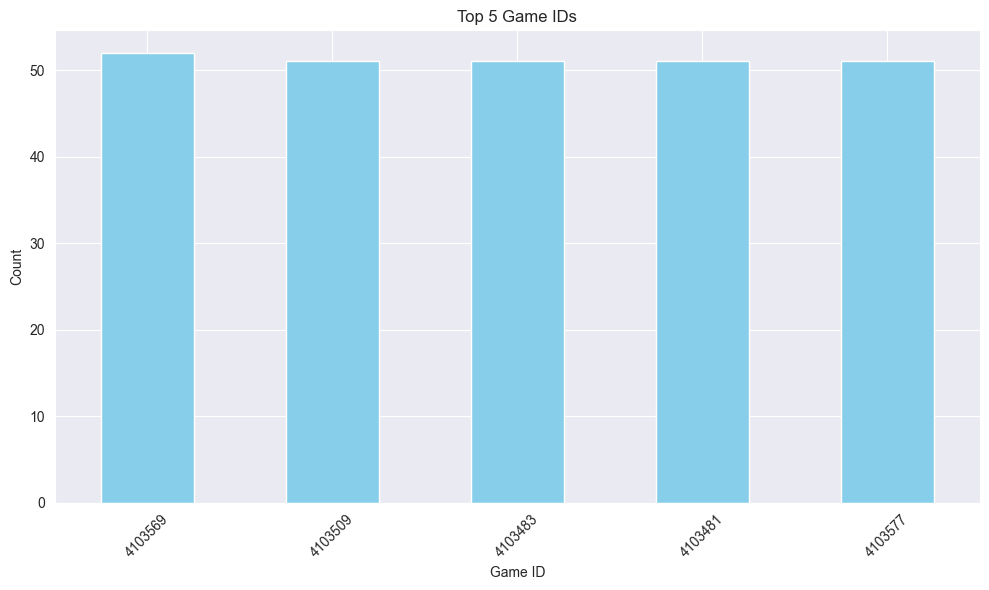

In [777]:
game_id_counts = gl['game_id'].value_counts()

top_5_game_ids = game_id_counts.nlargest(5)

plt.figure(figsize=(10, 6))
top_5_game_ids.plot(kind='bar', color='skyblue')

plt.title('Top 5 Game IDs')
plt.xlabel('Game ID')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

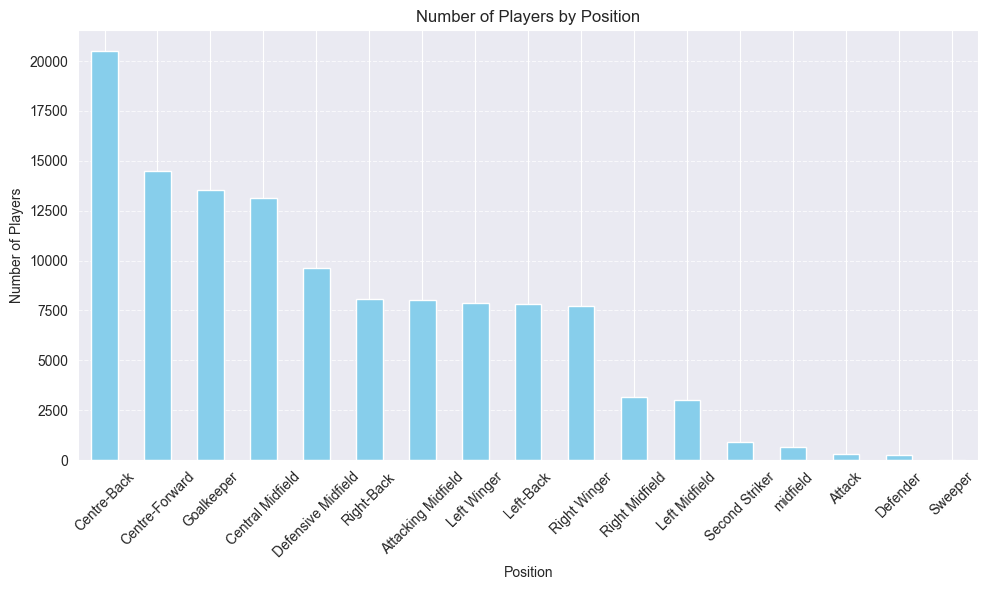

In [778]:
position_counts = gl['position'].value_counts()

plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Players by Position')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

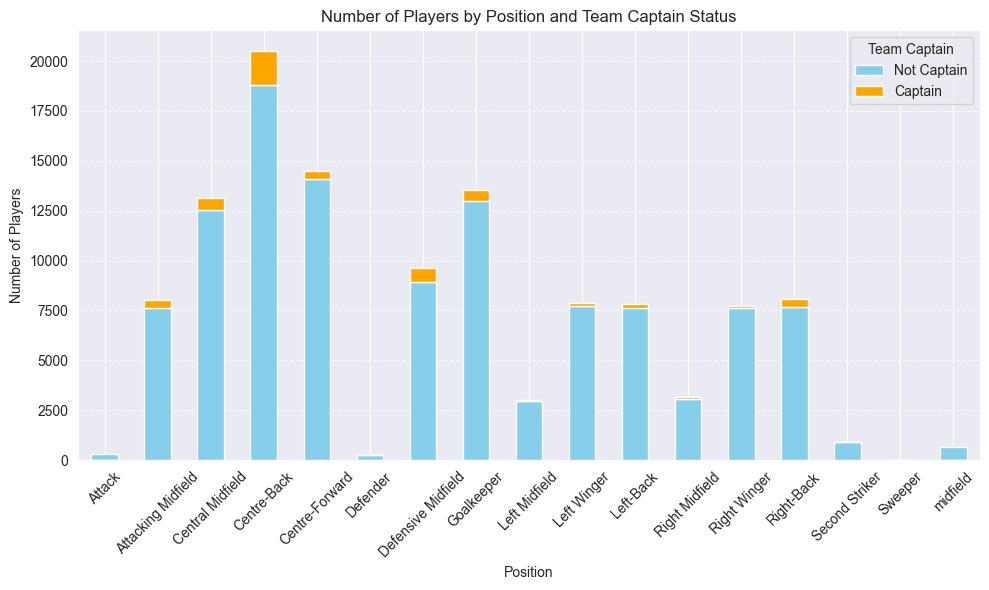

In [779]:
position_captain_counts = gl.groupby(['position', 'team_captain']).size().unstack(fill_value=0)

position_captain_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(10,6))

plt.title('Number of Players by Position and Team Captain Status')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.legend(title='Team Captain', labels=['Not Captain', 'Captain'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

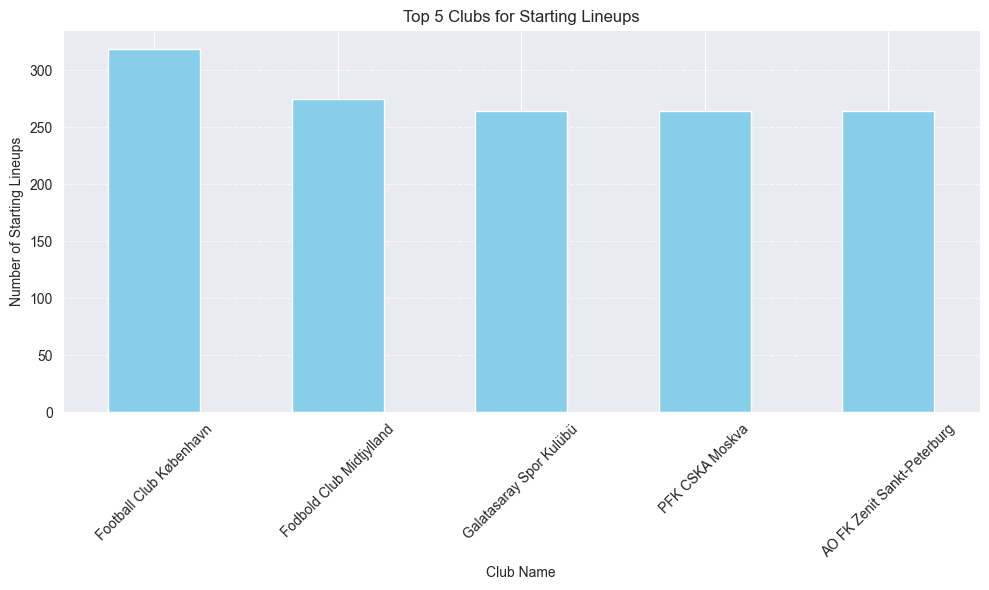

In [780]:
starting_lineups_data = gl[gl['type'] == 'starting_lineup']

club_counts = starting_lineups_data['club_id'].value_counts().head(5)

club_names = {
    190: "Football Club København",
    865: "Fodbold Club Midtjylland",
    141: "Galatasaray Spor Kulübü",
    2410: "PFK CSKA Moskva",
    964: "AO FK Zenit Sankt-Peterburg"
}
club_counts.index = club_counts.index.map(club_names)

club_counts.plot(kind='bar', color='skyblue', figsize=(10,6))

plt.title('Top 5 Clubs for Starting Lineups')
plt.xlabel('Club Name')
plt.ylabel('Number of Starting Lineups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

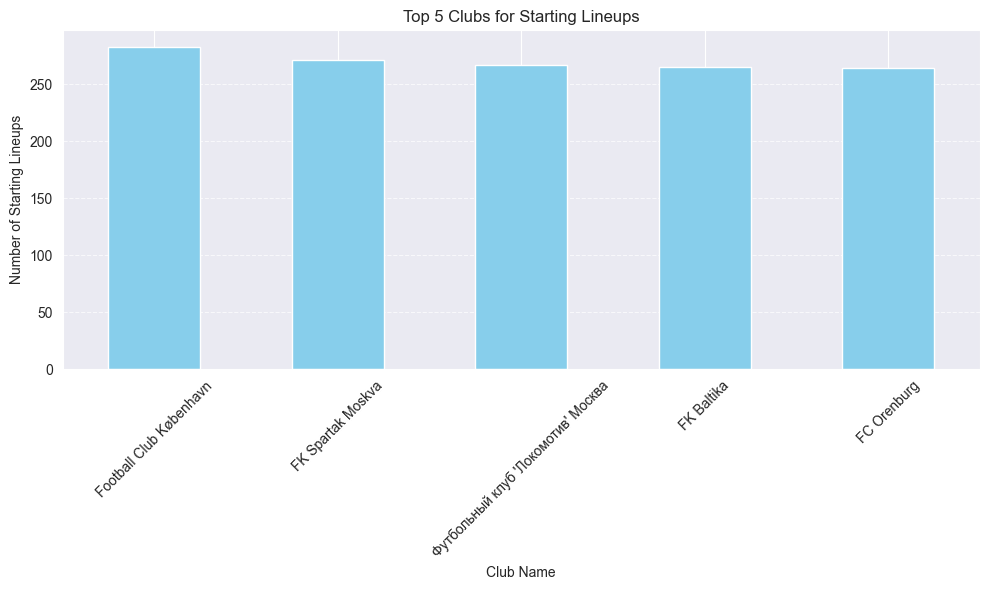

In [781]:
starting_lineups_data = gl[gl['type'] == 'substitutes']

club_counts = starting_lineups_data['club_id'].value_counts().head(5)

club_names = {
    190: "Football Club København",
    232: "FK Spartak Moskva",
    932: "Футбольный клуб 'Локомотив' Москва",
    2741: "FK Baltika",
    14589: "FC Orenburg"
}

club_counts.index = club_counts.index.map(club_names)

club_counts.plot(kind='bar', color='skyblue', figsize=(10,6))

plt.title('Top 5 Clubs for Starting Lineups')
plt.xlabel('Club Name')
plt.ylabel('Number of Starting Lineups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

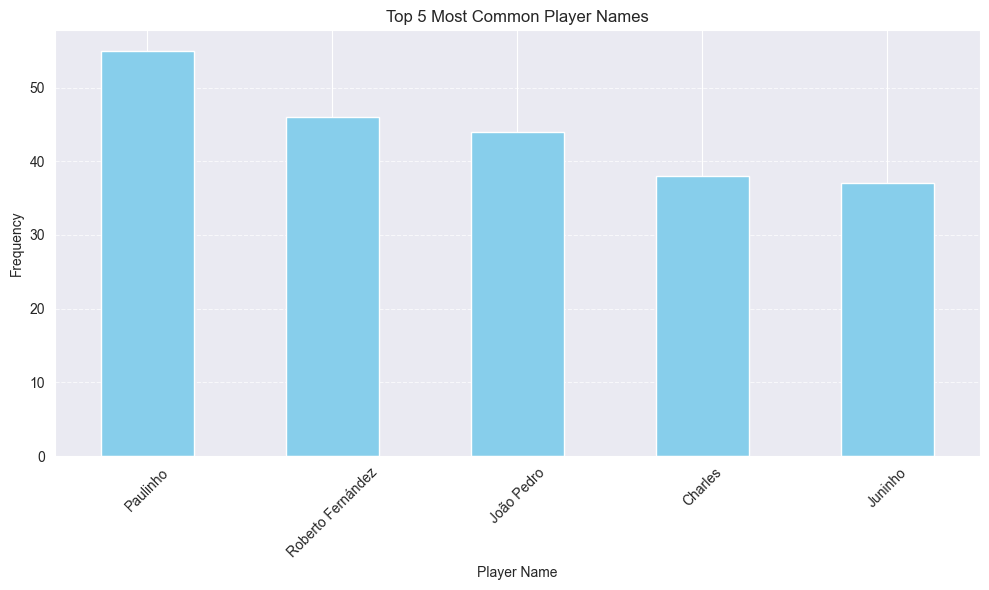

In [782]:
player_name_counts = gl['player_name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
player_name_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Common Player Names')
plt.xlabel('Player Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

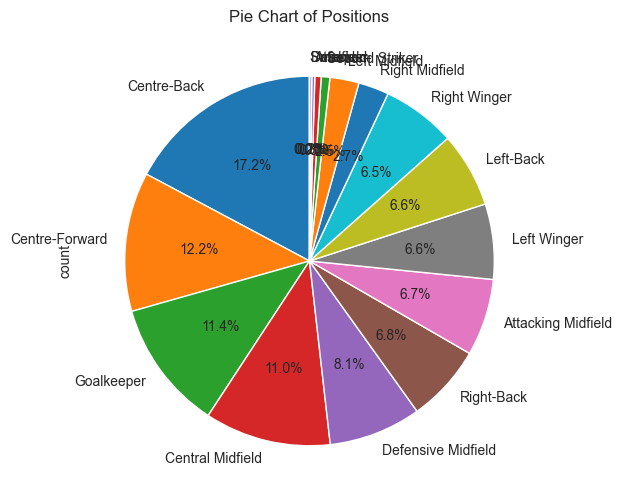

In [783]:
position_counts = gl['position'].value_counts()

plt.figure(figsize=(10, 6))
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Pie Chart of Positions')

plt.show()

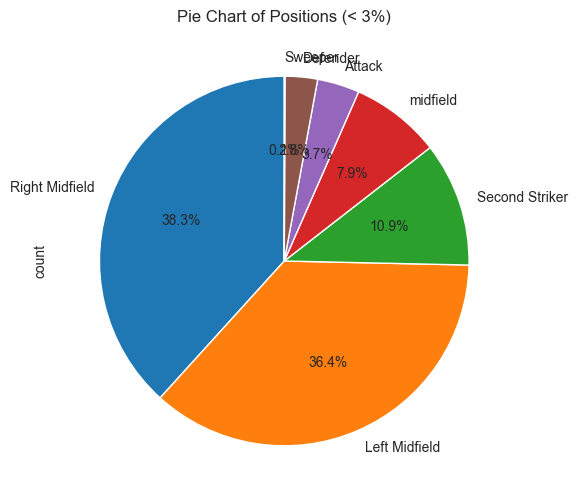

In [784]:
position_counts = gl['position'].value_counts()

total_count = position_counts.sum()

filtered_position_counts = position_counts[position_counts / total_count < 0.03]

plt.figure(figsize=(10, 6))
filtered_position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Pie Chart of Positions (< 3%)')

plt.show()

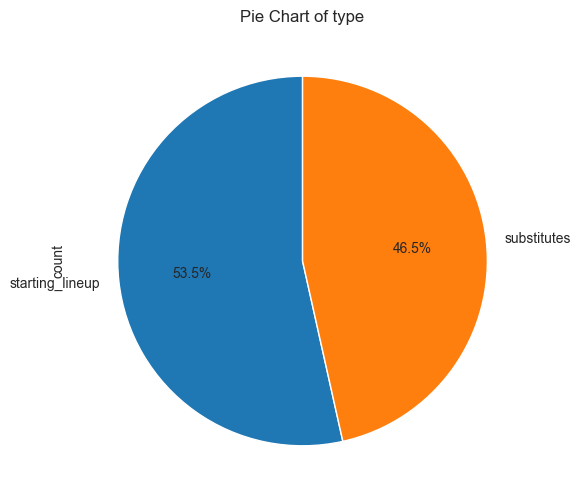

In [785]:
position_counts = gl['type'].value_counts()

plt.figure(figsize=(10, 6))
position_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.title('Pie Chart of type')

plt.show()

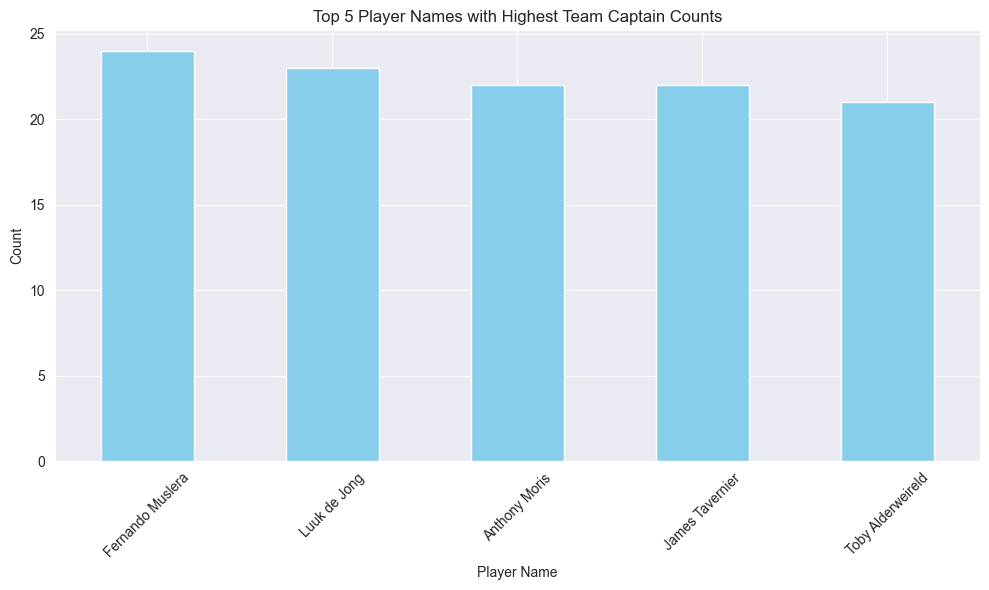

In [786]:
player_captain_sum = gl[gl['team_captain'] == True].groupby('player_id').size()

top_5_players = player_captain_sum.nlargest(5)

top_5_players_data = gl[gl['player_id'].isin(top_5_players.index)]

player_names = top_5_players_data[['player_id', 'player_name']].drop_duplicates().set_index('player_id')['player_name']

plt.figure(figsize=(10, 6))
top_5_players_data['player_id'].map(player_names).value_counts().plot(kind='bar', color='skyblue')

plt.title('Top 5 Player Names with Highest Team Captain Counts')
plt.xlabel('Player Name')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

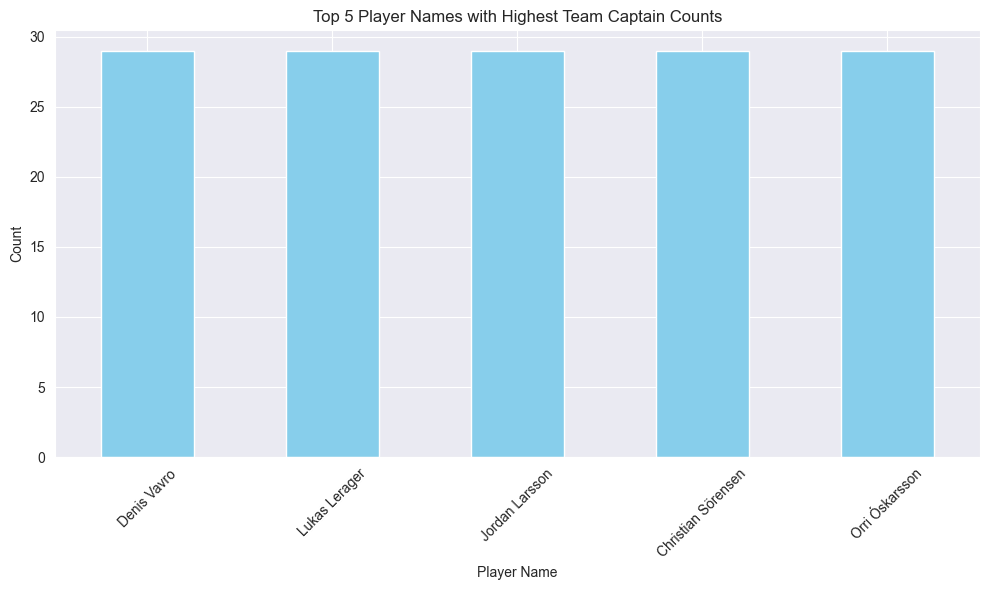

In [787]:
player_captain_sum = gl[gl['team_captain'] == False].groupby('player_id').size()

top_5_players = player_captain_sum.nlargest(5)

top_5_players_data = gl[gl['player_id'].isin(top_5_players.index)]

player_names = top_5_players_data[['player_id', 'player_name']].drop_duplicates().set_index('player_id')['player_name']

plt.figure(figsize=(10, 6))
top_5_players_data['player_id'].map(player_names).value_counts().plot(kind='bar', color='skyblue')

plt.title('Top 5 Player Names with Highest Team Captain Counts')
plt.xlabel('Player Name')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [788]:
player_captain_count = gl.groupby('player_id')['team_captain'].nunique()

conflicting_player_ids = player_captain_count[player_captain_count > 1]

print(conflicting_player_ids)

player_id
13434      2
15452      2
15570      2
15956      2
16306      2
          ..
1193957    2
1194108    2
1194502    2
1198609    2
1201469    2
Name: team_captain, Length: 963, dtype: int64


In [789]:
player_13434_data = gl[gl['player_id'] == 13434]

print(player_13434_data)

                         game_lineups_id  game_id  club_id             type  \
94339   ccf78eb78363c0f40c5e76e2aec04836  4164120     2454      substitutes   
116063  b7d3ede033d49f9e48cf6d861caefa78  4219003     2454      substitutes   
118825  7a15b1590645ec462acb3e61ddb3a2ee  4227993     2454  starting_lineup   

        number  player_id   player_name  team_captain     position  
94339        6      13434  Richard Wood         False  Centre-Back  
116063       6      13434  Richard Wood         False  Centre-Back  
118825       6      13434  Richard Wood          True  Centre-Back  


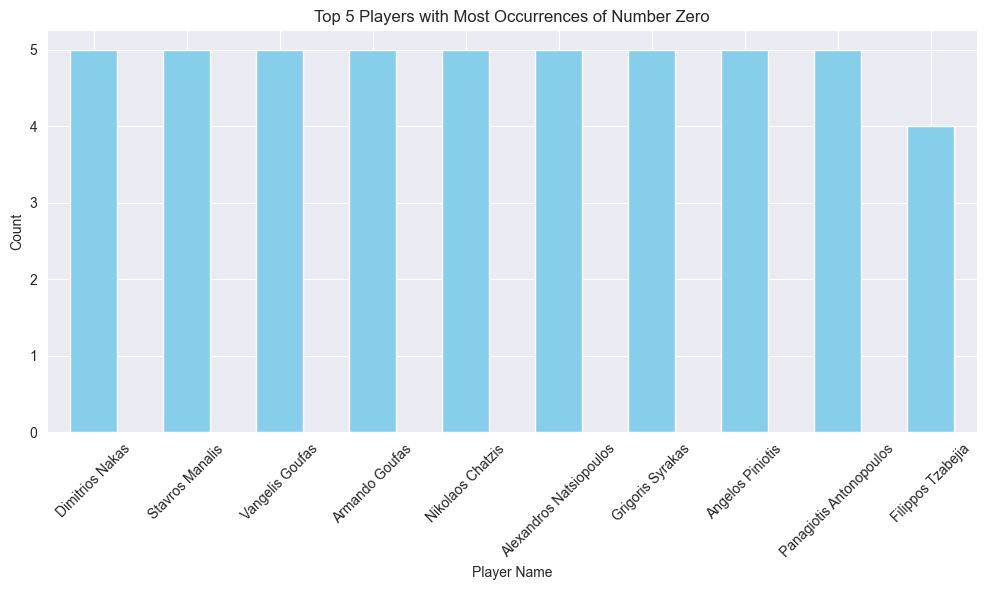

In [790]:
zero_number_players = gl[gl['number'] == 0]

player_zero_number_counts = zero_number_players['player_id'].value_counts()

top_5_players = player_zero_number_counts.nlargest(10)

player_names = gl[['player_id', 'player_name']].drop_duplicates().set_index('player_id')['player_name']

top_5_players_data = zero_number_players[zero_number_players['player_id'].isin(top_5_players.index)]

plt.figure(figsize=(10, 6))
top_5_players_data['player_id'].map(player_names).value_counts().plot(kind='bar', color='skyblue')

plt.title('Top 5 Players with Most Occurrences of Number Zero')
plt.xlabel('Player Name')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: ylabel='player_id'>

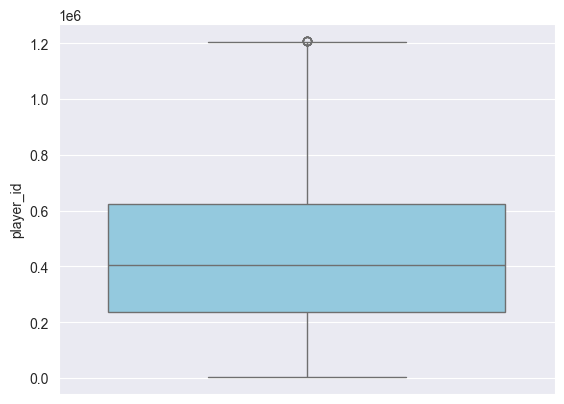

In [791]:
sns.boxplot(data = ngl['player_id'],
            color = 'skyblue')

In [792]:
max_player_id = gl['player_id'].max()

max_player = gl.loc[gl['player_id'] == max_player_id]

print(max_player)

                         game_lineups_id  game_id  club_id         type  \
117275  b43bbdc19a502bffe91ddc7e3a42f108  4220523     1191  substitutes   

        number  player_id    player_name  team_captain     position  
117275      34    1207627  Cameron McNab         False  Centre-Back  


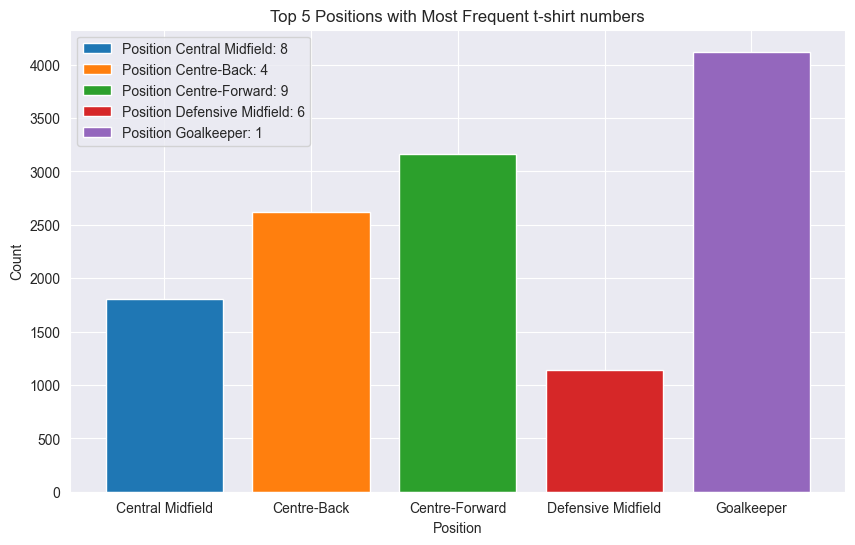

In [793]:
#This graph displays the most frequent shirt numbers among the top 5 most common positions
top_5_positions = gl['position'].value_counts().nlargest(5).index

top_5_positions_data = gl[gl['position'].isin(top_5_positions)]

position_number_counts = top_5_positions_data.groupby(['position', 'number']).size().reset_index(name='count')

most_frequent_numbers = position_number_counts.loc[position_number_counts.groupby('position')['count'].idxmax()]

plt.figure(figsize=(10, 6))
for position, data in most_frequent_numbers.groupby('position'):
    plt.bar(position, data['count'], label=f'Position {position}: {data["number"].values[0]}')

plt.title('Top 5 Positions with Most Frequent t-shirt numbers')
plt.xlabel('Position')
plt.ylabel('Count')
plt.legend()



plt.show()